In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)

In [2]:
country = pd.read_csv('EdStatsCountry.csv')

In [3]:
#country.head()

In [4]:
#country.tail()

In [5]:
def exploratory(data):
    print(f"Ce dataset contient {data.shape[0]} lignes etudiées sur {data.shape[1]} colonnes")
    #Recherche de doublons sur les lignes du dataset
    doublonL=data[data.duplicated(keep=False)]
    print(f"Il y a {doublonL.shape[0]} doublons dans les lignes")
    #Recherche de doublons sur les colonnes du dataset
    doublonC=data[data.duplicated(keep=False)].T
    print(f"Il y a {doublonC.shape[1]} doublons dans les colonnes")
    #Vérifie s'il y a des nan et les additionne pour chaque colonne
    perNan=data.isna().sum().sort_values(ascending=False)*100/len(data)
    print(f"Affichage du pourcentage de nan dans chaque colonnes: {perNan} %")
    #Observation du taux de remplissage de notre dataset
    sns.set(style="whitegrid")
    plt.figure(figsize=(16, 8))
    plt.title("Taux de remplissage du dataset")
    sns.heatmap(data.isnull(), cbar=False)
    plt.show()
    #compte les valeurs uniques de la série
    valeursUniques=data.nunique()
    print(f"Le nombre d'occurence des valeurs uniques:{valeursUniques}")
    ColumnData=data.columns
    print(f"La liste des colonnes est : {ColumnData}")
    




Ce dataset contient 241 lignes etudiées sur 32 colonnes
Il y a 0 doublons dans les lignes
Il y a 0 doublons dans les colonnes
Affichage du pourcentage de nan dans chaque colonnes: Unnamed: 31                                          100.000000
National accounts reference year                      86.721992
Alternative conversion factor                         80.497925
Other groups                                          75.933610
Latest industrial data                                55.601660
Vital registration complete                           53.941909
External debt Reporting status                        48.547718
Latest household survey                               41.493776
Latest agricultural census                            41.078838
Lending category                                      40.248963
PPP survey year                                       39.834025
Special Notes                                         39.834025
Source of most recent Income and expenditure data   

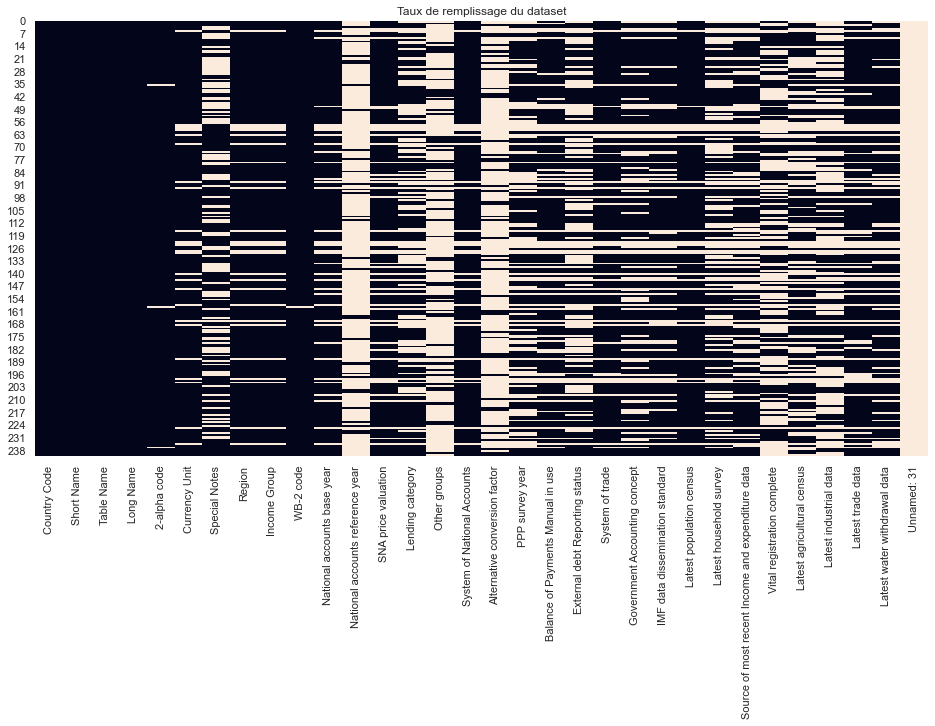

Le nombre d'occurence des valeurs uniques:Country Code                                         241
Short Name                                           241
Table Name                                           241
Long Name                                            241
2-alpha code                                         238
Currency Unit                                        152
Special Notes                                        131
Region                                                 7
Income Group                                           5
WB-2 code                                            240
National accounts base year                           43
National accounts reference year                      11
SNA price valuation                                    2
Lending category                                       3
Other groups                                           2
System of National Accounts                            3
Alternative conversion factor                 

In [6]:
exploratory(country)

In [7]:
#Suppression des colonnes inutiles dans notre étude avec la méthode drop
country= country.drop(['Country Code','Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes','Region', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data','Unnamed: 31'], axis=1)

In [8]:
#Enregistre le nom des différents pays dans une liste, la méthode unique() évite la répétition
l1=country['Short Name'].unique().tolist()

In [10]:
country['Income Group'].unique()

array(['High income: nonOECD', 'Low income', 'Upper middle income', nan,
       'Lower middle income', 'High income: OECD'], dtype=object)

In [11]:
country['Income Group'].dropna(axis=0)

0      High income: nonOECD
1                Low income
2       Upper middle income
3       Upper middle income
4      High income: nonOECD
6      High income: nonOECD
7       Upper middle income
8       Lower middle income
9       Upper middle income
10     High income: nonOECD
11        High income: OECD
12        High income: OECD
13      Upper middle income
14               Low income
15        High income: OECD
16               Low income
17               Low income
18               Low income
19      Upper middle income
20     High income: nonOECD
21     High income: nonOECD
22      Upper middle income
23      Upper middle income
24      Upper middle income
25     High income: nonOECD
26      Lower middle income
27      Upper middle income
28     High income: nonOECD
29     High income: nonOECD
30      Lower middle income
31      Upper middle income
32               Low income
33        High income: OECD
34        High income: OECD
35     High income: nonOECD
36        High incom

In [10]:
Delincomegroup= ['Low income', 'Upper middle income',
       'Lower middle income']

In [11]:
def nettoyagebyindex(data, a,DelList):
#Localisation par son index puis suppression des lignes
    for i in DelList:
        indexi = data[ data[a] == i].index
        data.drop(indexi , inplace=True)
    return data
        



In [12]:
a='Income Group'
Countries=nettoyagebyindex(country,a,Delincomegroup)
print(f"Après suppression des pays qui ne nous intéressent pas, il ne reste plus que {Countries.shape[0]} pays")

Après suppression des pays qui ne nous intéressent pas, il ne reste plus que 102 pays


In [13]:
#Suppression des pays dont on n'a pas d'information sur leurs revenues
Countries = Countries.dropna(axis=0)
print(f"Il nous reste de ce fait que {Countries.shape[0]} pays à étudier")


Il nous reste de ce fait que 75 pays à étudier


In [14]:
#Enregistrement du nom des pays qui restent dans la liste l2
l2=Countries['Short Name'].unique().tolist()
#Enregistrement des pays qui ne seront pas étudiés dans la liste listCountries
listCountries =[x for x in l1 if x not in l2]
#len(listCountries)

Bilan: EdStatsCountry.csv contient des informations globales sur l'économie de chaque pays du monde certaines valeurs manquent pour de nombreux pays, parfois la majorité des pays. Aucun doublon.

# Etude de EdStatsCountry-Series


In [15]:
countrySeries = pd.read_csv('EdStatsCountry-Series.csv')

Ce dataset contient 613 lignes etudiées sur 4 colonnes
Il y a 0 doublons dans les lignes
Il y a 0 doublons dans les colonnes
Affichage du pourcentage de nan dans chaque colonnes: Unnamed: 3     100.0
CountryCode      0.0
SeriesCode       0.0
DESCRIPTION      0.0
dtype: float64 %


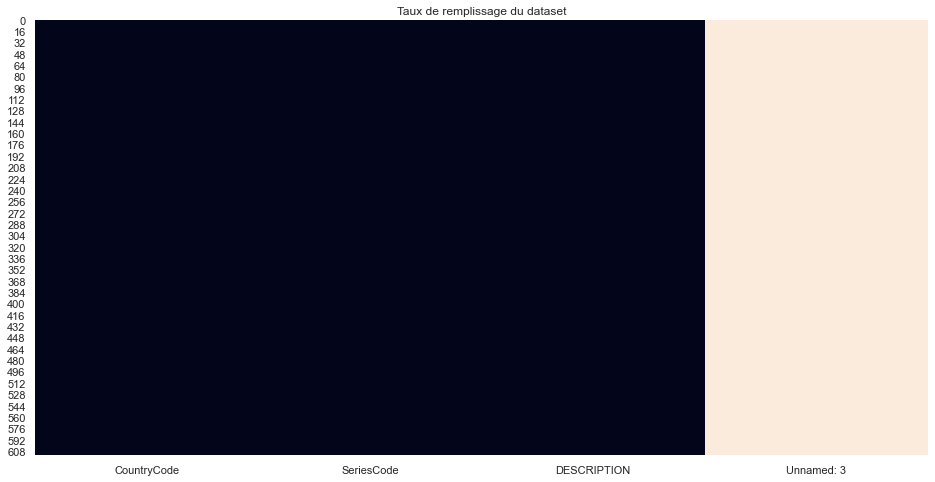

Le nombre d'occurence des valeurs uniques:CountryCode    211
SeriesCode      21
DESCRIPTION     97
Unnamed: 3       0
dtype: int64
La liste des colonnes est : Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')


In [16]:
exploratory(countrySeries)

Bilan : EdStatsCountry-Series.csv contient la source des données des informations contenues dans EdStatsCountry.csv. Les valeurs manquantes correspondent à la colonne "Unnamed: 3" qui est vide en intégralité et peut donc être supprimée sans perte d'information. Aucun doublon
Ce dataset ne présente aucun intérêt dans notre étude

# Etude de EdStatsSeries


In [17]:
 dataSeries = pd.read_csv('EdStatsSeries.csv')

Ce dataset contient 3665 lignes etudiées sur 21 colonnes
Il y a 0 doublons dans les lignes
Il y a 0 doublons dans les colonnes
Affichage du pourcentage de nan dans chaque colonnes: Unnamed: 20                            100.000000
Notes from original source             100.000000
License Type                           100.000000
Related indicators                     100.000000
Other web links                        100.000000
Unit of measure                        100.000000
Development relevance                   99.918145
General comments                        99.618008
Limitations and exceptions              99.618008
Statistical concept and methodology     99.372442
Aggregation method                      98.717599
Periodicity                             97.298772
Related source links                    94.133697
Base Period                             91.432469
Other notes                             84.938608
Short definition                        41.173261
Topic              

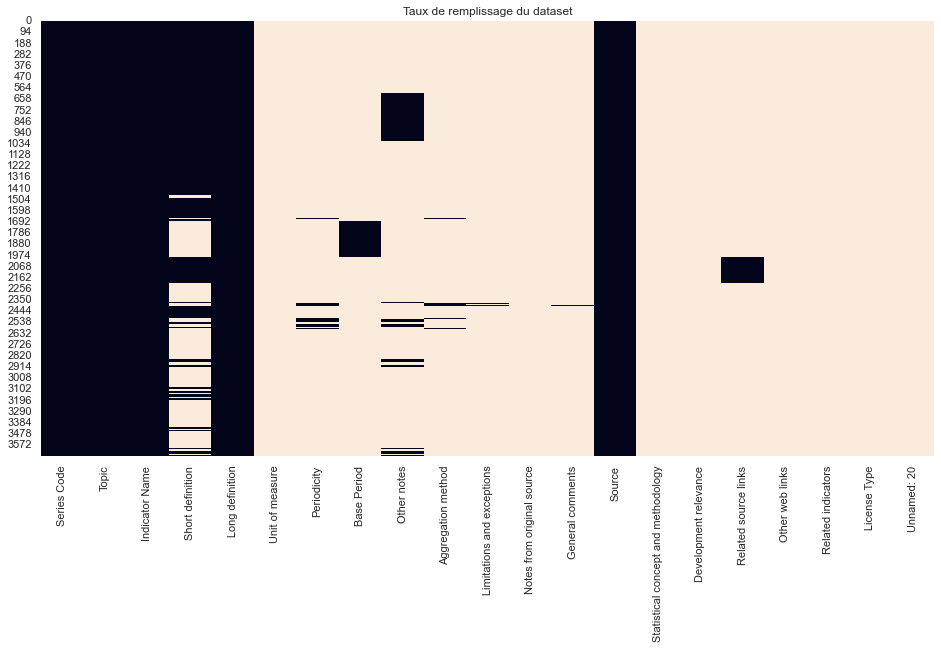

Le nombre d'occurence des valeurs uniques:Series Code                            3665
Topic                                    37
Indicator Name                         3665
Short definition                       1169
Long definition                        2060
Unit of measure                           0
Periodicity                               1
Base Period                               4
Other notes                              14
Aggregation method                        3
Limitations and exceptions                9
Notes from original source                0
General comments                          8
Source                                   31
Statistical concept and methodology       2
Development relevance                     1
Related source links                      1
Other web links                           0
Related indicators                        0
License Type                              0
Unnamed: 20                               0
dtype: int64
La liste des colonnes

In [18]:
exploratory(dataSeries)

Series : Series donne des données descriptives sur les indicateurs socio économiques disponibles dans data. 6 colonnes pour lesquelles il manque toutes les valeurs et qu'on pourrait supprimer (dont Unnamed: 20). Il manque plus de 80 % des valeurs pour 10 autres colonnes. et près de 50 % des valeurs pour la colonne "short definition". Aucun doublon. Nous ne la considrerons pas dans notre étude.

# Etude de EdStatsFootNote

In [19]:
footnote = pd.read_csv('EdStatsFootNote.csv')

Ce dataset contient 643638 lignes etudiées sur 5 colonnes
Il y a 0 doublons dans les lignes
Il y a 0 doublons dans les colonnes
Affichage du pourcentage de nan dans chaque colonnes: Unnamed: 4     100.0
CountryCode      0.0
SeriesCode       0.0
Year             0.0
DESCRIPTION      0.0
dtype: float64 %


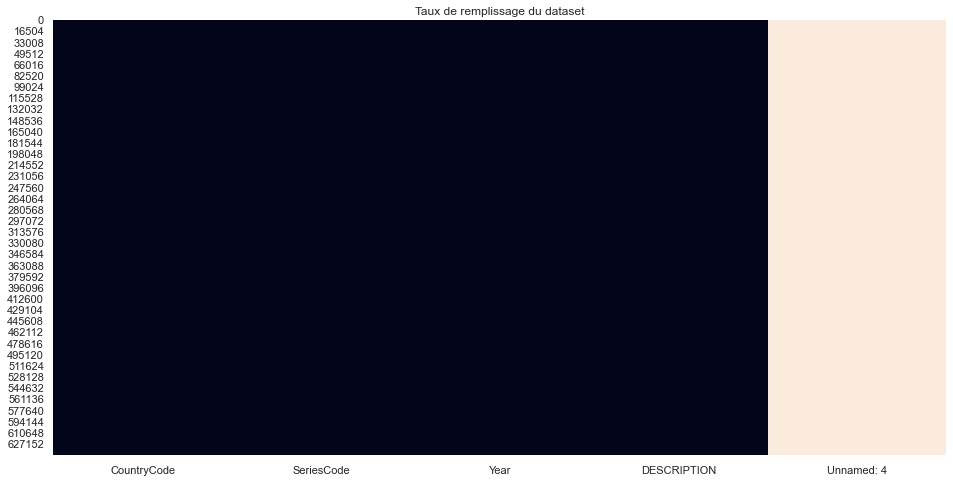

Le nombre d'occurence des valeurs uniques:CountryCode     239
SeriesCode     1558
Year             56
DESCRIPTION    9102
Unnamed: 4        0
dtype: int64
La liste des colonnes est : Index(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4'], dtype='object')


In [20]:
exploratory(footnote)

In [21]:
footnote['Year'] = footnote['Year'].apply(lambda x : x[2:])

In [22]:
footnote['Year'].sort_values().unique()

array(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2020', '2025', '2030', '2035', '2040', '2045', '2050'],
      dtype=object)

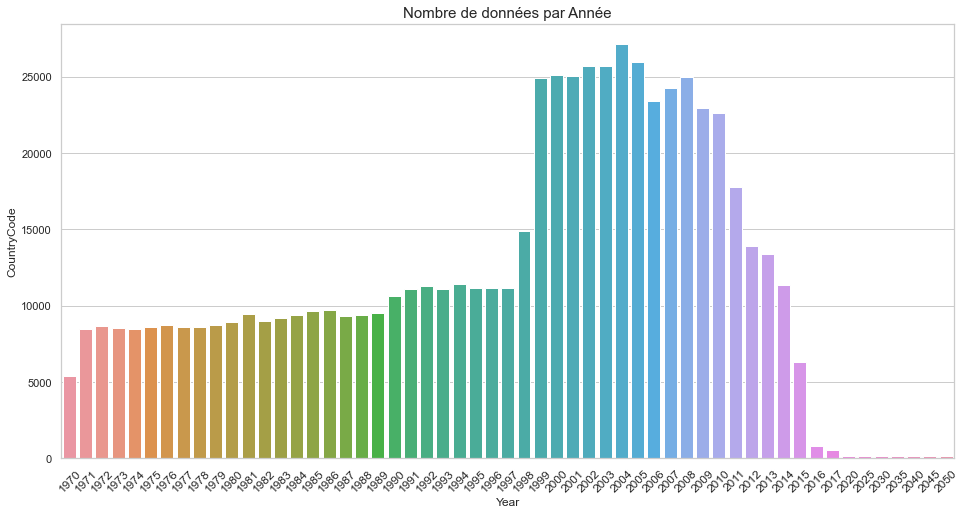

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
plt.title('Nombre de données par Année', size=15)
plot = sns.barplot(y = 'CountryCode', x='Year', data = footnote.groupby('Year').count().reset_index())
plot.set_xticklabels(labels = footnote.groupby('Year').count().reset_index()['Year'], rotation=45, size=12)
plt.show()

Footnote : footnote donne des informations sur l'année d'origine des données et description des données les valeurs manquantes correspondent à la colonne "Unnamed:4" qui est vide en intégralité et peut donc être supprimée sans perte d'information. Aucun doublon. Nous ne la considérerons pas non plus dans notre étude.

# Etude de EdStatsData

In [103]:
data = pd.read_csv('EdStatsData.csv')

Ce dataset contient 886930 lignes etudiées sur 70 colonnes
Il y a 0 doublons dans les lignes
Il y a 0 doublons dans les colonnes
Affichage du pourcentage de nan dans chaque colonnes: Unnamed: 69       100.000000
2017               99.983877
2016               98.144160
1971               95.993258
1973               95.992356
1972               95.984012
1974               95.971497
1979               95.849842
1976               95.773849
1982               95.770692
1989               95.767422
1977               95.763589
1978               95.763364
1983               95.663694
1988               95.653321
1984               95.647233
1987               95.643286
1981               95.627953
1986               95.560867
2045               94.200670
2070               94.200670
2065               94.200670
2060               94.200670
2055               94.200670
2050               94.200670
2030               94.200670
2020               94.200670
2040               94.200670
2080 

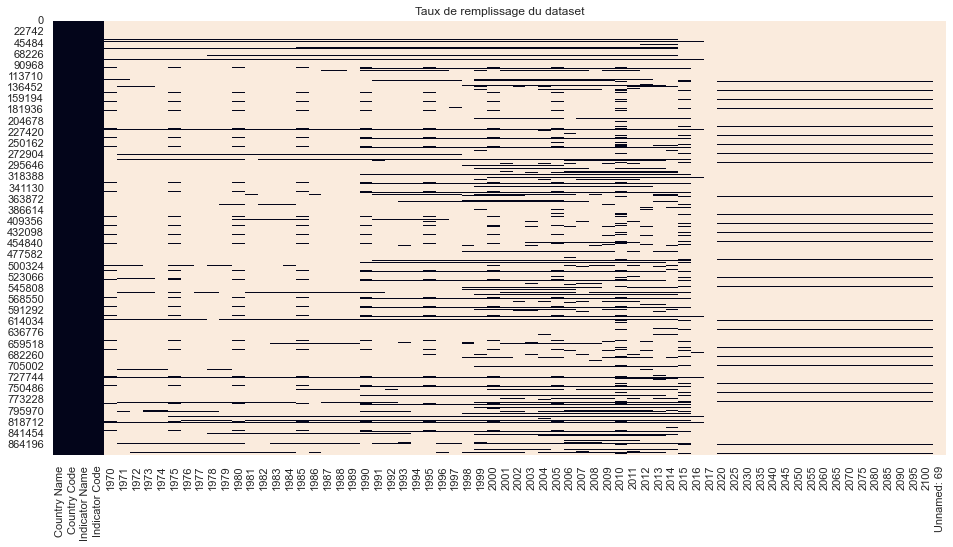

Le nombre d'occurence des valeurs uniques:Country Name         242
Country Code         242
Indicator Name      3665
Indicator Code      3665
1970               24595
1971               30892
1972               30982
1973               30988
1974               31139
1975               37838
1976               32679
1977               32808
1978               32887
1979               32359
1980               39456
1981               34090
1982               32969
1983               33683
1984               33903
1985               41133
1986               34774
1987               34021
1988               34013
1989               33181
1990               72800
1991               67172
1992               68026
1993               68440
1994               69974
1995               79225
1996               69787
1997               66665
1998               77746
1999              104452
2000              115971
2001              108633
2002              108974
2003              114344
2004    

In [104]:
exploratory(data)

In [105]:
#Nous moyennons par décennies pour obtenir plus de visibilité
data['1970s'] = data[[str(year) for year in range(1970,1980,1)]].mean(1)
data['1980s'] = data[[str(year) for year in range(1980,1990,1)]].mean(1)
data['1990s'] = data[[str(year) for year in range(1990,2000,1)]].mean(1)
data['2000s'] = data[[str(year) for year in range(2000,2010,1)]].mean(1)
data['2010s'] = data[[str(year) for year in [2010,2011,2012,2013,2014,2015,2016,2017]]].mean(1)
data['2020s'] = data[[str(year) for year in [2020,2025]]].mean(1)
data['2030s'] = data[[str(year) for year in [2030,2035]]].mean(1)
data['2040s'] = data[[str(year) for year in [2040,2045]]].mean(1)
data['2050s'] = data[[str(year) for year in [2050,2055]]].mean(1)
data['2060s'] = data[[str(year) for year in [2060,2065]]].mean(1)
data['2070s'] = data[[str(year) for year in [2070,2075]]].mean(1)
data['2080s'] = data[[str(year) for year in [2080,2085]]].mean(1)
data['2090s'] = data[[str(year) for year in [2090,2095]]].mean(1)
data['2100s'] = data[[str(2100)]].mean(1)

In [106]:
#Suppression des colonnes des années en ne laissant que la moyenne sur une décennie
data=data.drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014','2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'], axis=1)

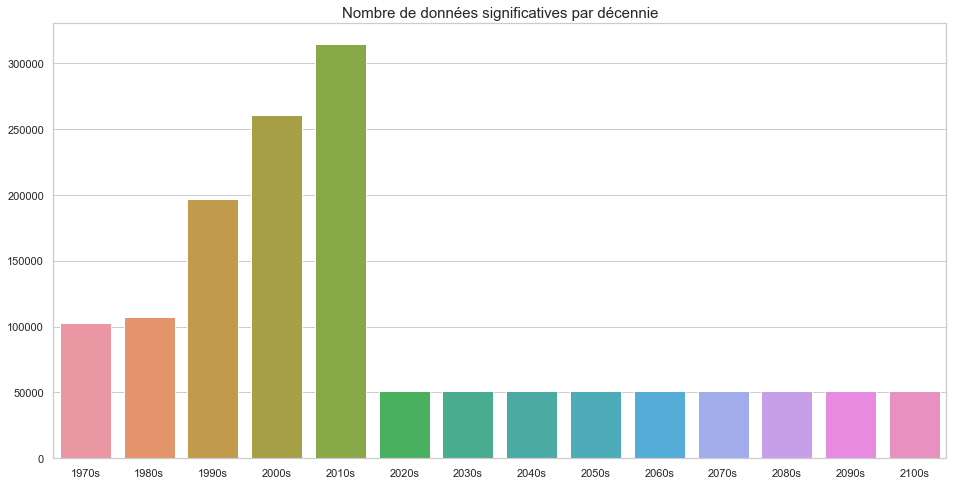

In [107]:
#Représentation du nombre de données significatives par décennie
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
plt.title('Nombre de données significatives par décennie', size=15)
plot = sns.barplot(y = data.shape[0] - data[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].isna().sum().values, x = data[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].isna().sum().index)
plt.show()

La décennie 2010 est celle où on a le plus de données. On va se baser uniquement sur cette décennie pour la suite de nos analyses

In [108]:
DelColumn = ['1970s', '1980s','1990s','2000s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']
data = data.drop(DelColumn, axis=1)
data

,Country Name,Country Code,Indicator Name,Indicator Code,2010s
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, male (%)",UIS.NERA.2.M,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR,85.478180
...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male (number)",UIS.LP.AG15T24.M,183071.500000
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, both sexes (%)",SE.ADT.1524.LT.ZS,90.679410
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, female (%)",SE.ADT.1524.LT.FE.ZS,92.656455
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, gender parity index (GPI)",SE.ADT.1524.LT.FM.ZS,1.046085


In [109]:
len(data['Indicator Name'].unique())

3665

Il y a un très grand nombre d'indicateurs.
On ne va pas tous les exploiter. Nous devrons sélectionner les plus pertinents pour notre analyse.

Bilan: EdStatsData.csv donne l'évolution de plusieurs indicateurs pour tous les pays du monde et macro régions du monde: Beaucoup de valeurs manquantes, dans le même ordre de grandeur pour toutes les années, il y a potentiellement certains indicateurs pour lesquels des données manquent. on remarque qu'il y a exactement le même nombre de valeurs manquantes pour les années >= 2020. Aucun doublon

# Analyse des données

In [110]:
#Nous mettons toutes les différentes régions dans une liste appelées regions pour éviter leur prise en compte en tant que pays
regions = ['Arab World',
         'East Asia & Pacific',
         'East Asia & Pacific (excluding high income)',
         'East Asia & Pacific (developing only)',
         'East Asia & Pacific (all income levels)',
         'Euro area',
         'European Union'
         'Europe & Centraµl Asia',
         'Europe & Central Asia (excluding high income)',
         'Europe & Central Asia (developing only)',
         'Europe & Central Asia (all income levels)',
         'European Union',
         'Heavily indebted poor countries (HIPC)',
         'High income',
         'Latin America & Caribbean',
         'Latin America & Caribbean (developing only)',
         'Latin America & Caribbean (excluding high income)',
         'Least developed countries: UN classification',
         'Low & middle income',
         'Low income',
         'Lower middle income',
         'Middle East & North Africa',
         'Middle East & North Africa (excluding high income)',
         'Middle East & North Africa (all income levels)',
         'Middle East & North Africa (developing only)',
         'Middle income',
         'North America',
         'OECD members',
         'South Asia',
         'Sub-Saharan Africa',
         'Sub-Saharan Africa (excluding high income)',
         'Upper middle income',
         'World',
        ]

In [111]:
dataGraph = data.copy()

In [112]:
datacopy= data.copy()

In [113]:
#Cette liste contient le nom des pays et régions qui seront supprimées de notre étude
listCountries1=listCountries + regions
#Suppression des données de tous les éléments de la liste listCountries1 du dataset data
for i in listCountries1:
    indexi = datacopy[ datacopy['Country Name'] == i].index
    datacopy.drop(indexi , inplace=True)


In [114]:
#Création d'une liste l4 qui contient le nom de tous les pays qui sont toujours présentes dans notre dataset data
l4=datacopy ['Country Name'].unique().tolist()
#l5 contient le nom des pays qui viennent d'être supprimés
l5 = [x for x in l4 if x not in l2]

#Suppression des pays qui ne nous intéressent pas avec la fonction nettoyagebyindex
a='Country Name'
datacopy=nettoyagebyindex(datacopy,a,l5)


In [115]:
listIndic=datacopy['Indicator Name'].unique().tolist()

In [116]:
listIndic

['Adjusted net enrolment rate, lower secondary, both sexes (%)',
 'Adjusted net enrolment rate, lower secondary, female (%)',
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, lower secondary, male (%)',
 'Adjusted net enrolment rate, primary, both sexes (%)',
 'Adjusted net enrolment rate, primary, female (%)',
 'Adjusted net enrolment rate, primary, gender parity index (GPI)',
 'Adjusted net enrolment rate, primary, male (%)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Adjusted net enrolment rate, upper secondary, female (%)',
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, upper secondary, male (%)',
 'Adjusted net intake rate to Grade 1 of primary education, both sexes (%)',
 'Adjusted net intake rate to Grade 1 of primary education, female (%)',
 'Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)',
 'Adjusted 

Après analyse des différents indicateurs, nous en avons choisi les 3 plus pertinents par raport à notre mission

In [117]:
bestIndicators = ['Internet users (per 100 people)', 'Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary', 'Population, ages 15-24, total']
bestIndicators

['Internet users (per 100 people)',
 'Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary',
 'Population, ages 15-24, total']

In [39]:
datacopy=datacopy.dropna(axis=0)

In [126]:
#Premier indicateur à étudier, l'accès à internet, cet indicateur nous servira de premier filtre
#Nous prendrons que les pays avec une couverture internet au minimu égale à celle de la France
dataInternet=datacopy[datacopy['Indicator Name']=='Internet users (per 100 people)']


In [127]:
listToFilter1= dataInternet['Country Name'].tolist()
filter1=dataInternet['2010s'] >=80
datay=dataInternet[filter1]
listafterfilter1 =datay['Country Name'].tolist()
listafterfilter1
newlist = [x for x in listToFilter1 if x not in listafterfilter1]


In [128]:
a='Country Name'
datacopy=nettoyagebyindex(datacopy,a,newlist)

In [129]:
datacopy

,Country Name,Country Code,Indicator Name,Indicator Code,2010s
106285,Andorra,AND,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN
106286,Andorra,AND,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN
106287,Andorra,AND,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN
106288,Andorra,AND,"Adjusted net enrolment rate, lower secondary, male (%)",UIS.NERA.2.M,NaN
106289,Andorra,AND,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR,NaN
...,...,...,...,...,...
846610,United Kingdom,GBR,"Youth illiterate population, 15-24 years, male (number)",UIS.LP.AG15T24.M,NaN
846611,United Kingdom,GBR,"Youth literacy rate, population 15-24 years, both sexes (%)",SE.ADT.1524.LT.ZS,NaN
846612,United Kingdom,GBR,"Youth literacy rate, population 15-24 years, female (%)",SE.ADT.1524.LT.FE.ZS,NaN
846613,United Kingdom,GBR,"Youth literacy rate, population 15-24 years, gender parity index (GPI)",SE.ADT.1524.LT.FM.ZS,NaN


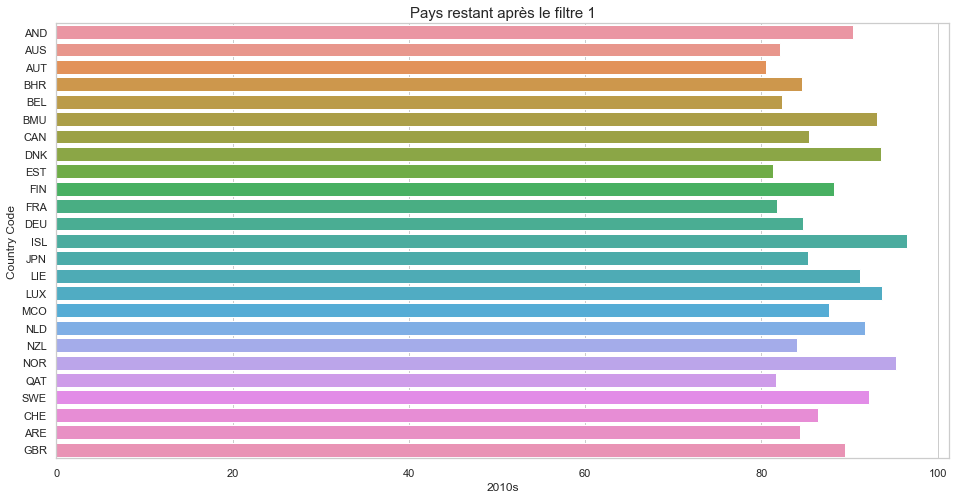

In [130]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
plt.title('Pays restant après le filtre 1', size=15)
plot = sns.barplot(y = datacopy['Country Code'], x=datacopy[datacopy['Indicator Name']=='Internet users (per 100 people)']['2010s'].sort_values(ascending=False), data = datacopy[datacopy['Indicator Name']=='Internet users (per 100 people)'])
plt.show()

In [131]:
#Application de notre deuxième indicateur pour étudier le pourcentage de personens de plus de 15 et ayant fii le lycée
#Nous prenons la France comme référence
dataAge1524=datacopy[datacopy['Indicator Name']=='Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary']
dataAge1524
Age15_24 = dataAge1524.loc[(dataAge1524['Country Name']=='France')|(dataAge1524['Country Name']=='Germany')|(dataAge1524['Country Name']=='Japan')|(dataAge1524['Country Name']=='United Kingdom')]
Age15_24

,Country Name,Country Code,Indicator Name,Indicator Code,2010s
337557,France,FRA,Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary,BAR.SEC.CMPT.15UP.ZS,38.22
355882,Germany,DEU,Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary,BAR.SEC.CMPT.15UP.ZS,54.75
447507,Japan,JPN,Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary,BAR.SEC.CMPT.15UP.ZS,40.98
843327,United Kingdom,GBR,Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary,BAR.SEC.CMPT.15UP.ZS,47.31


In [132]:
listToFilter2= dataAge1524['Country Name'].tolist()
filter2=dataAge1524['2010s'] >=38
datay1=dataAge1524[filter2]
listafterfilter2 =datay1['Country Name'].tolist()
newlist2 = [x for x in listToFilter2 if x not in listafterfilter2]
newlist2

['Andorra',
 'Bahrain',
 'Belgium',
 'Bermuda',
 'Canada',
 'Iceland',
 'Liechtenstein',
 'Luxembourg',
 'Monaco',
 'New Zealand',
 'Qatar',
 'United Arab Emirates']

In [133]:
a= 'Country Name'
datacopy = nettoyagebyindex(datacopy, a,newlist2)
datacopy

,Country Name,Country Code,Indicator Name,Indicator Code,2010s
128275,Australia,AUS,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,86.046183
128276,Australia,AUS,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,87.719564
128277,Australia,AUS,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,1.038297
128278,Australia,AUS,"Adjusted net enrolment rate, lower secondary, male (%)",UIS.NERA.2.M,84.484358
128279,Australia,AUS,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR,97.379276
...,...,...,...,...,...
846610,United Kingdom,GBR,"Youth illiterate population, 15-24 years, male (number)",UIS.LP.AG15T24.M,NaN
846611,United Kingdom,GBR,"Youth literacy rate, population 15-24 years, both sexes (%)",SE.ADT.1524.LT.ZS,NaN
846612,United Kingdom,GBR,"Youth literacy rate, population 15-24 years, female (%)",SE.ADT.1524.LT.FE.ZS,NaN
846613,United Kingdom,GBR,"Youth literacy rate, population 15-24 years, gender parity index (GPI)",SE.ADT.1524.LT.FM.ZS,NaN


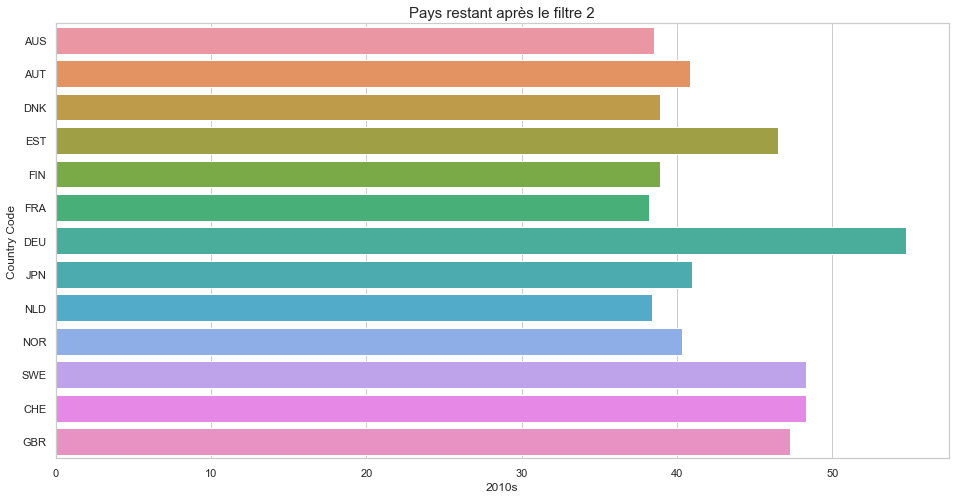

In [134]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
plt.title('Pays restant après le filtre 2', size=15)
plot = sns.barplot(y = datacopy['Country Code'], x= datacopy[datacopy['Indicator Name']=='Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary']['2010s'].sort_values(ascending=False), data =datacopy[datacopy['Indicator Name']=='Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary'])

In [135]:
#Application du filtre pour voir les pays avec une population 15-24 ans supérieure ou égale à celle de la France
dataPopulation=datacopy[datacopy['Indicator Name']=='Population, ages 15-24, total']

In [136]:
listToFilter3= dataPopulation['Country Name'].tolist()
filter3=dataPopulation['2010s'] >=7.582918e+06
datay2=dataPopulation[filter3]
listafterfilter3 =datay2['Country Name'].tolist()
datacopy=datay2
newlist3 = [x for x in listToFilter3 if x not in listafterfilter3]

In [137]:
a= 'Country Name'
datacopy = nettoyagebyindex(datacopy, a,newlist3)

In [138]:
datacopy['Country Name'].unique()

array(['France', 'Germany', 'Japan', 'United Kingdom'], dtype=object)

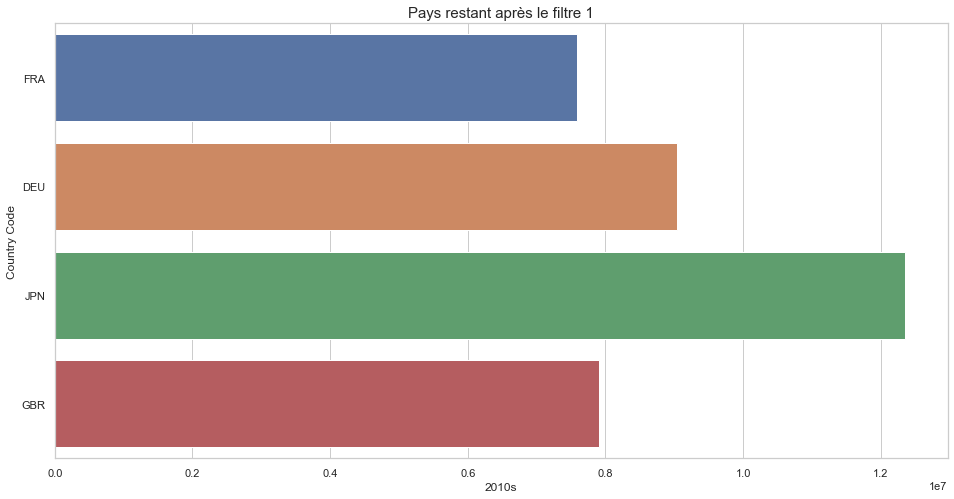

In [154]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
plt.title('Pays restant après le filtre 1', size=15)
plot = sns.barplot(y = datacopy['Country Code'], x=datacopy[datacopy['Indicator Name']=='Population, ages 15-24, total']['2010s'].sort_values(ascending=False), data = datacopy[datacopy['Indicator Name']=='Internet users (per 100 people)'])
plt.show()

    Donc il est plus pertinent de considérer ces pays que sont le japon, l'Angleterre et l'Allemagne pour une internalisation de Academy

### Observation des pays sélectionnés 

In [139]:
datacopy

,Country Name,Country Code,Indicator Name,Indicator Code,2010s
339662,France,FRA,"Population, ages 15-24, total",SP.POP.1524.TO.UN,7.582918e+06
357987,Germany,DEU,"Population, ages 15-24, total",SP.POP.1524.TO.UN,9.036869e+06
449612,Japan,JPN,"Population, ages 15-24, total",SP.POP.1524.TO.UN,1.235106e+07
845432,United Kingdom,GBR,"Population, ages 15-24, total",SP.POP.1524.TO.UN,7.904708e+06


In [151]:
internet = dataInternet.loc[(dataInternet['Country Name']=='France')|(dataInternet['Country Name']=='Germany')|(dataInternet['Country Name']=='Japan')|(dataInternet['Country Name']=='United Kingdom')]
internet

,Country Name,Country Code,Indicator Name,Indicator Code,2010s
338555,France,FRA,Internet users (per 100 people),IT.NET.USER.P2,81.789500
356880,Germany,DEU,Internet users (per 100 people),IT.NET.USER.P2,84.745271
448505,Japan,JPN,Internet users (per 100 people),IT.NET.USER.P2,85.306401
844325,United Kingdom,GBR,Internet users (per 100 people),IT.NET.USER.P2,89.441457


In [152]:
Age15_24 = dataAge1524.loc[(dataAge1524['Country Name']=='France')|(dataAge1524['Country Name']=='Germany')|(dataAge1524['Country Name']=='Japan')|(dataAge1524['Country Name']=='United Kingdom')]
Age15_24

,Country Name,Country Code,Indicator Name,Indicator Code,2010s
337557,France,FRA,Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary,BAR.SEC.CMPT.15UP.ZS,38.22
355882,Germany,DEU,Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary,BAR.SEC.CMPT.15UP.ZS,54.75
447507,Japan,JPN,Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary,BAR.SEC.CMPT.15UP.ZS,40.98
843327,United Kingdom,GBR,Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary,BAR.SEC.CMPT.15UP.ZS,47.31


In [141]:
popul = datacopy[datacopy['Indicator Name']=='Population, ages 15-24, total']['2010s'].sort_values(ascending=False)

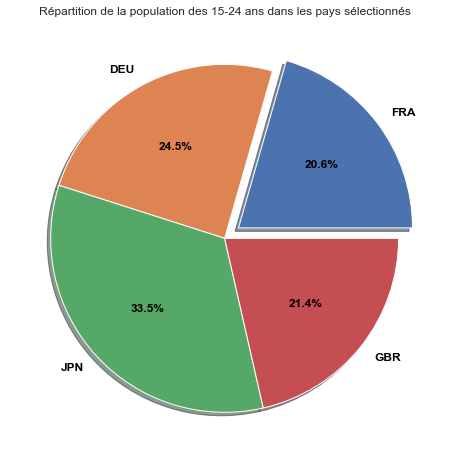

In [142]:
result = datacopy['2010s']
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

explodes = np.zeros(4)
explodes[0] = .1

plt.pie(result, labels=datacopy['Country Code'], 
        startangle=0, 
        shadow=True,
        explode=explodes,
        autopct='%1.1f%%',
        textprops=dict(color="black",size=12, weight="bold"))
plt.title("Répartition de la population des 15-24 ans dans les pays sélectionnés")
plt.show()

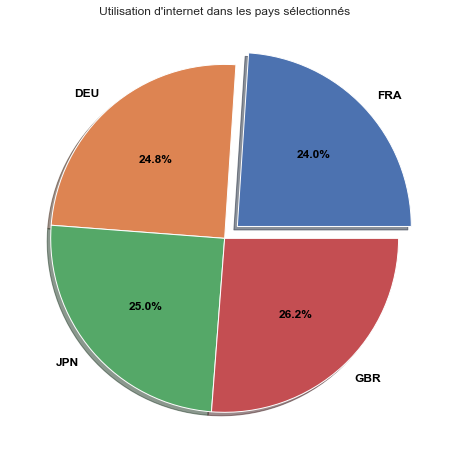

In [153]:
result1 = internet['2010s']
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

explodes = np.zeros(4)
explodes[0] = .1

plt.pie(result1, labels=datacopy['Country Code'], 
        startangle=0, 
        shadow=True,
        explode=explodes,
        autopct='%1.1f%%',
        textprops=dict(color="black",size=12, weight="bold"))
plt.title("Utilisation d'internet dans les pays sélectionnés")
plt.show()

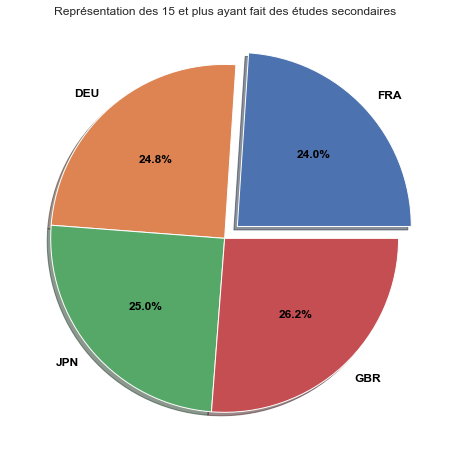

In [150]:
result2 = internet['2010s']
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

explodes = np.zeros(4)
explodes[0] = .1

plt.pie(result2, labels=datacopy['Country Code'], 
        startangle=0, 
        shadow=True,
        explode=explodes,
        autopct='%1.1f%%',
        textprops=dict(color="black",size=12, weight="bold"))
plt.title("Représentation des 15 et plus ayant fait des études secondaires")
plt.show()

### Ceci conclut notre analyse